In [277]:
!pip install yfinance
!pip install pandas_ta
import pandas_ta as pta
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
import pylab as pl


*   XLK - Technology
*   XLE - Energy
*   XLF - Financials
*   XLV - Health Care
*   XLRE - Real Estate
*   XLB - Materials
*   XLY - Consumer Discretionary
*   XLP - Consumer Staples
*   XLU - Utilities
*   XLI - Industrials
*   IYZ - Telecommunications











In [186]:
tickers = [ "XLK",
            "XLE",
            "XLF",
            "XLV",
            "XLRE",
            "XLB",
            "XLY",
            "XLP",
            "XLU",
            "XLI",
            "IYZ" ]

            
adj_tickers = [ "XLK",
            "XLE",
            "XLI",
            "XLV",
            "XLB",
            "XLY",
            "XLP",
            "XLU"]

Before we jump into the strategies, let's get a better understandig of how the sectors behaved in the relevant period of time. Did they go up in total? Did they go down? Are they volatile? Are they different from each other? 

In [187]:
start_date = "2012-01-01"

In [ ]:
full_data = yf.download(tickers, start=start_date, end=date.today(),  interval="3mo")
df = full_data["Adj Close"].dropna(inplace = False)
sector_yield = df.pct_change()[1:]

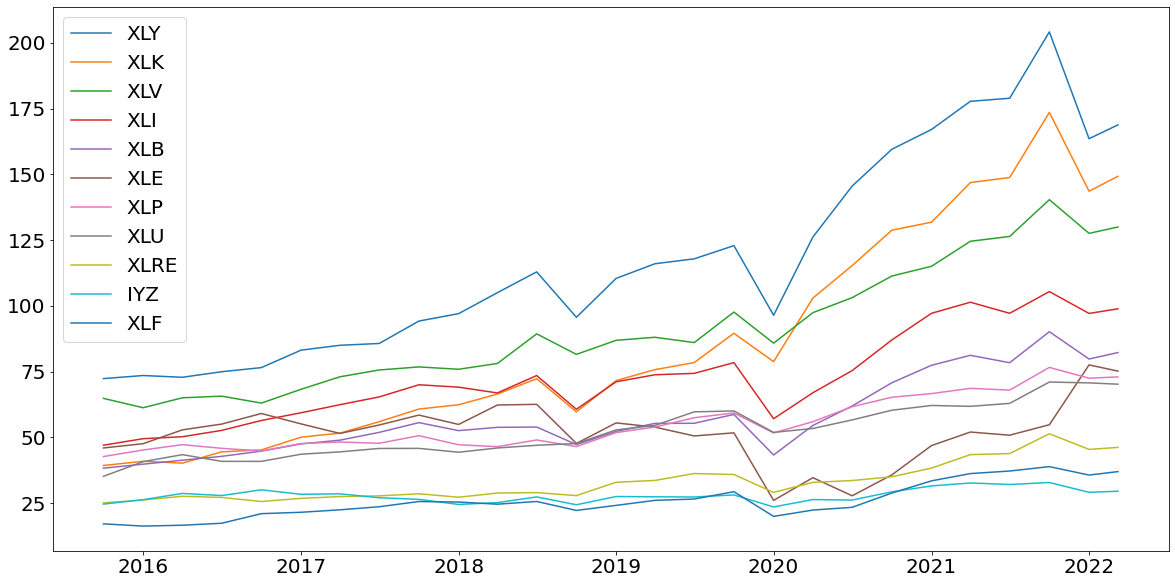

In [189]:

plt.rcParams['figure.figsize'] = [20, 10]

plt.rc('font', size=20)

plt.plot(df.XLY, label = "XLY")
plt.plot(df.XLK, label = "XLK")
plt.plot(df.XLV, label = "XLV")
plt.plot(df.XLI, label = "XLI")
plt.plot(df.XLB, label = "XLB")
plt.plot(df.XLE, label = "XLE")
plt.plot(df.XLP, label = "XLP")
plt.plot(df.XLU, label = "XLU")
plt.plot(df.XLRE, label = "XLRE")
plt.plot(df.IYZ, label = "IYZ")
plt.plot(df.XLF, label = "XLF")

plt.legend()

plt.show()







Basically, it seems that the sectors are different than each other in their growth but on the other hand, there are similar aspects that may affect them all. For example, we can clearly see how the covid pandemic affected all sector. On the other hand, it is clear that some sectors are way stronger then others in their overall growth. Consumer Discretionary & Technology are the two strongest sectors and have exponential growths during this period(excluding the beggining of this year). Financials & Telecommunications are pretty moderate and did'nt change much during these years. This is something we might take into consideration while building some strategies, we might want to exclude 'weak' sectors or a least give them different weights in our model. 
Furthermore, we can notice the special trend of the Energy sector, which started as the strongest sector and deacreased a lot up until recent years where it increased rapidly and had a very profitable 2 years. When all strong sectors went down in 2022, Energy kept on growing. This is also something we might want to include in our strategies. 

#Buying the worst 3 preforming sectors strategy

In [190]:
def buy_worst_3(start_date, tickers, interval):
  total_amount = 1000000
  investment_dict = dict.fromkeys(tickers, 0)
  full_data = yf.download(tickers, start=start_date, end=date.today(),  interval = interval)
  df = full_data["Adj Close"].dropna(inplace = False)
  sector_yield = df.pct_change()
  sector_yield = sector_yield.T

  for i in range(1, len(sector_yield.columns)-1):
    worst_3 = sector_yield.iloc[:,i].nsmallest(3)
    dic_worst = dict(worst_3)
    val = [abs(x) for x in dic_worst.values()]
    norm_val = [abs(dic_worst[key])/sum(val) for key in dic_worst.keys()]
    count = 0
    for key in worst_3.keys():
      investment_dict[key] += (norm_val[count]*total_amount)*(1+sector_yield.loc[key][i+1]) #Investing in each of the 3 worst sectors the relative amount of money as they preformed (relatively to the other 2).
      count += 1

    total_amount = sum(investment_dict.values())
    investment_dict = dict.fromkeys(tickers, 0)
  return round(total_amount)

#1.1.2021 - Now



In [191]:
#Choosing the dates we want to check 
start_date = "2021-01-01"

Rebalancing our invesment each day 

In [192]:
total_amount = buy_worst_3(start_date, tickers, "1d")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1304285
The total yield percentage will be: 30.43


Rebalancing our investment each week

In [193]:
total_amount = buy_worst_3(start_date, tickers, "1wk")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1100143
The total yield percentage will be: 10.01


Rebalancing our investment each month

In [194]:
total_amount = buy_worst_3(start_date, tickers, "1mo")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1306384
The total yield percentage will be: 30.64


Rebalancing our investment each quarter

In [195]:
total_amount = buy_worst_3(start_date, tickers, "3mo")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1329540
The total yield percentage will be: 32.95


#1.1.2019 - Now


In [201]:
start_date = "2019-01-01"

Rebalancing our investment each day

In [202]:
total_amount = buy_worst_3(start_date, tickers, "1d")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1720552
The total yield percentage will be: 72.06


Rebalancing our investment each week

In [203]:
total_amount = buy_worst_3(start_date, tickers, "1wk")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1538009
The total yield percentage will be: 53.8


Rebalancing our investment each month

In [204]:
total_amount = buy_worst_3(start_date, tickers, "1mo")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1413746
The total yield percentage will be: 41.37


Rebalancing our investment each quarter

In [205]:
total_amount = buy_worst_3(start_date, tickers, "3mo")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1490432
The total yield percentage will be: 49.04


#1.1.2010 - Now

In [211]:
start_date = "2010-01-01"

Rebalancing our investment each day

In [212]:
total_amount = buy_worst_3(start_date, tickers, "1d")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 2173688
The total yield percentage will be: 117.37


Rebalancing our investment each week

In [213]:
total_amount = buy_worst_3(start_date, tickers, "1wk")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1000000
The total yield percentage will be: 0.0


Rebalancing our investment each month

In [214]:
total_amount = buy_worst_3(start_date, tickers, "1mo")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 2274293
The total yield percentage will be: 127.43


Rebalancing our investment each quarter

In [215]:
total_amount = buy_worst_3(start_date, tickers, "3mo")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 2099663
The total yield percentage will be: 109.97


As we can see, in this strategy, we started with 1M$ of investment and chose to invest all of it in the 3 sectors that had the worst preformance in each month. The way we divided our investment was relatively to the preformances. Each sector got the relative investment to its actual preformance. We normalized only the three worst sectors and gave each sector the amount based on how bad he was. This was actually an improvment from dividing our investment equally (between the 3 worst sectors). 

Note that if we change our strategy interval (period of examination) we get way different results for each date range. It seems like rebalancing each day gets the overall highest results but considering the transfer fees, the work and  the effort we might prefer taking the monthly or quartely rebalancing which get pretty similar results. 

So, we learned that, even though this method is pretty simple and not so advanced, it could get a goot profit. 

#Buying the best 3 preforming sectors strategy

similarly to the previous strategy, now we can take the **best** performing sectors each month(instead of the worst 3). 

In [216]:
def buy_best_3(start_date, tickers, interval):
  total_amount = 1000000
  investment_dict = dict.fromkeys(tickers, 0)
  full_data = yf.download(tickers, start=start_date, end=date.today(),  interval = interval)
  df = full_data["Adj Close"].dropna(inplace = False)
  sector_yield = df.pct_change()
  sector_yield = sector_yield.T

  for i in range(1, len(sector_yield.columns)-1):
    best_3 = sector_yield.iloc[:,i].nlargest(3)
    dic_best = dict(best_3)
    val = [abs(x) for x in dic_best.values()]
    norm_val = [abs(dic_best[key])/sum(val) for key in dic_best.keys()]
    count = 0
    for key in best_3.keys():
      investment_dict[key] += (norm_val[count]*total_amount)*(1+sector_yield.loc[key][i+1]) #Investing in each of the 3 best sectors the relative amount of money as they preformed (relatively to the other 2).
      count += 1

    total_amount = sum(investment_dict.values())
    investment_dict = dict.fromkeys(tickers, 0)
  return round(total_amount)

#1.1.2021 - Now


In [217]:
start_date = "2021-01-01"

Rebalancing our invesment each day 

In [218]:
total_amount = buy_best_3(start_date, tickers, "1d")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1352300
The total yield percentage will be: 35.23


Rebalancing our invesment each week

In [219]:
total_amount = buy_best_3(start_date, tickers, "1wk")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1425845
The total yield percentage will be: 42.58


Rebalancing our invesment each month

In [220]:
total_amount = buy_best_3(start_date, tickers, "1mo")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1298773
The total yield percentage will be: 29.88


Rebalancing our invesment each quarter

In [221]:
total_amount = buy_best_3(start_date, tickers, "3mo")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 915788
The total yield percentage will be: -8.42


#1.1.2019 - Now


In [222]:
start_date = "2019-01-01"

In [223]:
total_amount = buy_best_3(start_date, tickers, "1d")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 2086066
The total yield percentage will be: 108.61


In [224]:
total_amount = buy_best_3(start_date, tickers, "1wk")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1706703
The total yield percentage will be: 70.67


In [225]:
total_amount = buy_best_3(start_date, tickers, "1mo")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1865256
The total yield percentage will be: 86.53


In [226]:
total_amount = buy_best_3(start_date, tickers, "3mo")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1384519
The total yield percentage will be: 38.45


#1.1.2010 - Now


In [227]:
start_date = "2010-01-01"

In [228]:
total_amount = buy_best_3(start_date, tickers, "1d")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 2429761
The total yield percentage will be: 142.98


In [229]:
total_amount = buy_best_3(start_date, tickers, "1wk")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1000000
The total yield percentage will be: 0.0


In [230]:
total_amount = buy_best_3(start_date, tickers, "1mo")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 2210964
The total yield percentage will be: 121.1


In [231]:
total_amount = buy_best_3(start_date, tickers, "3mo")
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 2098095
The total yield percentage will be: 109.81


As we can see, the results are pretty much similar to the worst 3 strategy. We can motice that if we rebalance our investment every 3 months from 1.1.2021 till now we lose money in this strategy. Other then that we gain good prefits. For example, if we would have rebalanced our investment every quarter using this strategy, from 1.1.2010 we could have more than doubled our money. 

Note that, we saw that IYZ, XLF & XLRE are pretty weak sectors that over the years did not gain much profit and they seem pretty moderate. So for the next three strategies I chose to exclude them from the tickers list. 

#Historical Probabilities Strategy

In this strategy, for every given week, we would invest in the three sectors with the highest estimated avverage to go up based on historical data. For each week, we have the closing price(for each sector) and we can check what is the plausible scenario for that sector in the next week depending on how well it did in the past when it closed a week with the same yield range. Then, we will take the mean of the yield of the next week for each yield range for each week and for each sector. So, we will have a data set of the estimated yield for each week for each sector and then we will invest our money in the top 3  sectors with the highest yield probabilty. 

This time, we will divide the money differently than the previous two strategies. All 3 sectors with the highest predicted yield value will third of the amount we currently have(which changes according to each weeks yield). 

In this strategy, the rebalancing is weekly.

In [272]:
#Helpful function for dividing into yield date ranges
def group_classifier(array): 
  groups = []

  for x in array:

    if x <= -0.03:
      groups.append(1)
    if  -0.03 < x <= -0.02:
      groups.append(2)
    if  -0.02 < x <= -0.01:
      groups.append(3)
    if  -0.01 < x <= 0:
      groups.append(4)
    if  0 < x <= 0.01:
      groups.append(5)
    if  0.01 < x <= 0.02:
      groups.append(6)
    if  0.02 < x <= 0.03:
      groups.append(7)
    if  x > 0.03:
      groups.append(8)

  return groups


In [273]:
#The core function for this strategy, outputs the predicted values for next week (for all weeks) for a given ticker. 
def ticker_group_dict(ticker, start_date, end_date):  
  full_data = yf.download(ticker, start=start_date, end=end_date,  interval = "1wk")
  df = full_data["Adj Close"].dropna(inplace = False)
  sector_yield = df.pct_change()[1:]

  groups = group_classifier(sector_yield)
  df_yield_range = pd.DataFrame(sector_yield)
  df_yield_range["group"] = groups


  d_mean = {}
  for i in range(1,9):
    lst_next = []
    for g in range(len(df_yield_range.group)-1):
      if df_yield_range.group[g] == i:
        lst_next.append(df_yield_range["Adj Close"][g+1])
        d_mean[i] = round(sum(lst_next)/len(lst_next), 4)

  relevant_data = yf.download(ticker, start=end_date, end=date.today(),  interval = "1wk")
  ticker_price = relevant_data["Adj Close"].dropna(inplace = False)
  ticker_change = ticker_price.pct_change()
  ticker_change = ticker_change.T[1:]

  groups_for_relevant_date = group_classifier(ticker_change)
  pred_for_nxt_wk = [d_mean[x] for x in groups_for_relevant_date]

  return pred_for_nxt_wk


In [274]:
#The actual investment function for this strategy
def mean_investment_strategy(df, tickers):
  amount = 1000000
  investment_dict = dict.fromkeys(tickers, 0)

  full_data = yf.download(tickers, start=end_date, end=date.today(),  interval = "1wk")
  df = full_data["Adj Close"].dropna(inplace = False)
  sector_yield = df.pct_change()[1:]

  for i in range(len(nxt_wk_df)-1):
    highest = nxt_wk_df.iloc[i,:].nlargest(3)
    best = dict(highest)

    investment_dict[list(best.keys())[0]] = (amount*0.33)*(1 + sector_yield[list(best.keys())[0]][i])
    investment_dict[list(best.keys())[1]] = (amount*0.33)*(1 + sector_yield[list(best.keys())[1]][i])
    investment_dict[list(best.keys())[2]] = (amount*0.33)*(1 + sector_yield[list(best.keys())[2]][i])
    
    amount -= amount*0.99

    amount += sum(investment_dict.values())
    investment_dict = dict.fromkeys(tickers, 0)

  return round(amount)

#1.1.2021 - Now

Setting the dates according to the date we want to check (historically). We will take 4 years prior to the actuall dates we want to invest in. 

In [278]:
start_date, end_date = "2017-01-01", "2021-01-01"

In [279]:
nxt_wk_df = pd.DataFrame()
for ticker in adj_tickers:
  nxt_wk_df[ticker] = ticker_group_dict(ticker, start_date, end_date)
nxt_wk_df.head(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,XLK,XLE,XLI,XLV,XLB,XLY,XLP,XLU
0,0.0082,0.0094,-0.0014,0.0008,-0.0037,-0.0000,0.0046,0.0028
1,0.0047,-0.0095,-0.0022,0.0011,0.0025,0.0107,-0.0011,0.0028
2,0.0082,-0.0095,0.0062,-0.0001,0.0261,0.0133,0.0015,-0.0007
3,0.0029,0.0094,0.0069,0.0008,0.0028,0.0107,-0.0011,0.0011
4,0.0047,0.0094,-0.0000,0.0015,-0.0033,0.0041,0.0015,-0.0007
5,0.0156,0.0094,-0.0022,0.0008,0.0028,0.0042,0.0015,0.0051
6,0.0067,0.0094,0.0069,-0.0001,-0.0033,0.0134,-0.0083,0.0221
7,-0.0122,0.0094,-0.0022,0.0109,0.0022,0.0133,0.0046,0.0051
8,0.0047,0.0094,0.0053,-0.0038,0.0021,0.0051,0.0014,-0.0041
9,0.0156,-0.0095,-0.0000,0.0015,-0.0037,0.0041,0.0015,0.0028


In [280]:
total_amount = mean_investment_strategy(nxt_wk_df, tickers)
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  11 of 11 completed
The total amount we have in the end of the period is: 1452389
The total yield percentage will be: 45.24


#1.1.2019 - Now

In [291]:
start_date, end_date = "2015-01-01", "2019-01-01"

In [292]:
nxt_wk_df = pd.DataFrame()
for ticker in adj_tickers:
  nxt_wk_df[ticker] = ticker_group_dict(ticker, start_date, end_date)
nxt_wk_df.head(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,XLK,XLE,XLI,XLV,XLB,XLY,XLP,XLU
0,0.0024,0.0035,-0.0021,0.0019,0.0004,0.0012,0.0017,0.0009
1,0.0019,-0.0041,-0.0021,-0.0088,-0.0026,0.0001,0.0024,-0.0026
2,0.0044,-0.0024,0.0118,0.0044,0.0023,-0.0011,-0.0002,0.0009
3,0.0019,-0.0041,-0.0021,0.0001,0.0004,0.0061,-0.0010,-0.0026
4,0.0030,-0.0024,0.0021,0.0016,0.0043,-0.0011,0.0017,-0.0010
5,-0.0068,-0.0041,-0.0021,-0.0088,-0.0026,0.0001,0.0017,0.0045
6,0.0024,0.0035,0.0045,0.0016,-0.0026,0.0012,-0.0002,-0.0010
7,0.0030,0.0035,-0.0015,0.0018,0.0043,0.0012,0.0017,0.0045
8,0.0030,-0.0024,0.0118,0.0018,0.0004,-0.0011,0.0017,-0.0010
9,-0.0068,-0.0038,-0.0015,0.0033,0.0004,0.0061,0.0017,0.0045


In [293]:
total_amount = mean_investment_strategy(nxt_wk_df, adj_tickers)
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  8 of 8 completed
The total amount we have in the end of the period is: 1042139
The total yield percentage will be: 4.21


#1.1.2010 - Now

In [294]:
start_date, end_date = "2006-01-01", "2010-01-01"

In [295]:
nxt_wk_df = pd.DataFrame()
for ticker in adj_tickers:
  nxt_wk_df[ticker] = ticker_group_dict(ticker, start_date, end_date)
nxt_wk_df.head(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,XLK,XLE,XLI,XLV,XLB,XLY,XLP,XLU
0,-0.0053,0.0174,-0.0013,-0.0003,0.0100,0.0061,0.0025,0.0028
1,-0.0082,-0.0005,-0.0103,0.0054,0.0066,0.0060,0.0207,0.0037
2,-0.0014,-0.0005,0.0049,0.0054,0.0066,0.0023,0.0048,0.0038
3,-0.0082,-0.0134,0.0094,0.0054,-0.0083,0.0061,0.0048,0.0038
4,0.0002,-0.0058,0.0041,0.0009,-0.0004,0.0010,-0.0027,-0.0011
5,0.0002,-0.0058,0.0009,0.0005,-0.0004,-0.0062,-0.0018,0.0028
6,0.0148,0.0172,0.0018,0.0037,0.0100,0.0010,0.0025,0.0093
7,-0.0005,-0.0044,-0.0013,0.0009,-0.0004,0.0026,0.0025,0.0093
8,-0.0057,-0.0058,-0.0013,0.0005,0.0012,0.0026,0.0025,0.0028
9,-0.0005,0.0174,-0.0013,0.0009,0.0012,0.0010,-0.0027,0.0093


In [296]:
total_amount = mean_investment_strategy(nxt_wk_df, adj_tickers)
print("The total amount we have in the end of the period is:", total_amount)
print("The total yield percentage will be:", round(100*((total_amount/1000000)-1),2))

[*********************100%***********************]  8 of 8 completed
The total amount we have in the end of the period is: 599147
The total yield percentage will be: -40.09


As we can see, this method is profitable for the short term. For the long term, from 2010 till now, this strategy is not a good one and we would lose money. Initially, this seems strange because we expect the strategy to work better when we have more data but it does not. The reason is that thing change, the behaviour of the sector before a decade does not represent the sector's behavious now.  
For the first period we would make a profit of approx 40% which is the best we got till now. This is a nice profit but obviously we want a better strategy with higher results. 
Up until now, the first two strategies already beat this one for the long - medium term but fail at comparison to the short period. 



Now we can think of different strategies which are slightly more sophisticated then the previous 3 and are based on known technical analysis methods. We will use different technical analysis tools & methods that we learned in class, such as Bollinger Bands, RSI and SMA. 

#Simple Moving Average (SMA) Strategy


In this strategy, we will buy & sell sectors based on SMA. The twist here would be as follows: First we will choose 3 main & intersting sectors - XLY, XLK & XLE. Note that, I chosed them based on their preformences and trends over the years (as we saw in the beggining of this assignment). We chose XLE mainly because of its recent preformances. We did not chose Health Care sector because it lacks very dominant parties (in contrast to the other sectors).

Second, and this is where it might be interesting, we will choose 2 of the biggest (by Total Net Assets) stocks from each of these sectors. According to the SMA trends of these stocks we would buy/sell each matching **sector**. 

The idea here is to try and "catch" the sector before its short SMA crosses its long SMA. Usually, while using SMA, if we buy when the short SMA crosses the long SMA upwards, we might miss some of the profit. 
Ideally, using this method, we can "predict" what the whole sector trend would be. We assume here that the "biggest" 2 stocks "pull" the whole market of their sector towards them. 


In [242]:
#Example of SMA graph for a stock

amzn = yf.Ticker("AMZN")
amzn_hist = amzn.history(start="2017-01-01", end="2022-03-01", interval="1d")


sma_21 = pd.DataFrame()
sma_21['close'] = amzn_hist['Close'].rolling(window=21).mean()
sma_100 = pd.DataFrame()
sma_100['close'] = amzn_hist['Close'].rolling(window=100).mean()

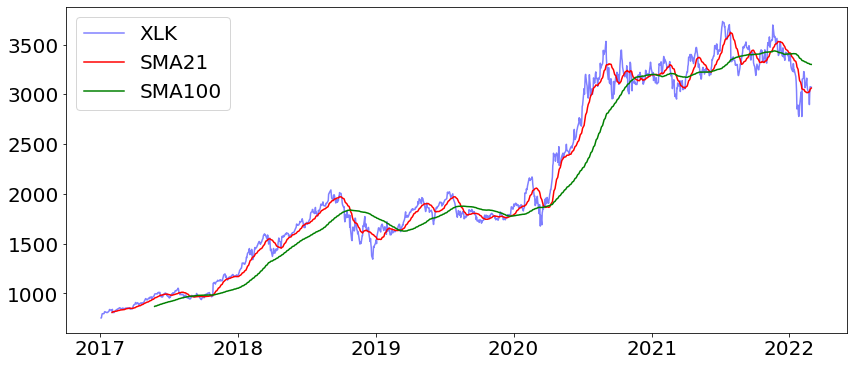

In [244]:
#SMA plot

pl.figure(figsize=(14,6))
pl.plot(amzn_hist.index,amzn_hist['Close'],label='XLK',color="b", alpha = 0.5)
pl.plot(sma_21.index,sma_21['close'], label='SMA21',color="r")
pl.plot(sma_100.index,sma_100['close'],label='SMA100', color="g")
pl.legend(loc="best")

pl.show()


We are focusing on when the red line (the short sma) crosses the green line (long sma). We want to get an indication from these behaviours whether to buy or sell.  

*   XLK - Technology
*   XLY - Consumer Discretionary
*   XLE - Energy


First, lets observe the behaviour of these sectors over the last decade

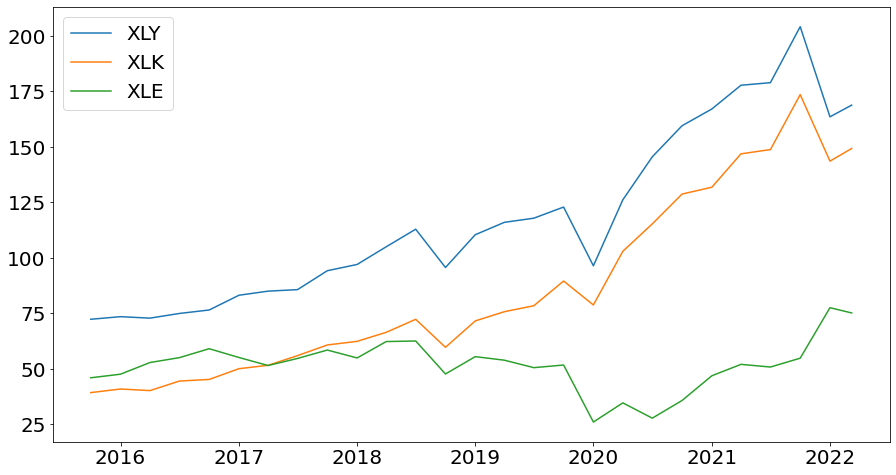

In [245]:
plt.rcParams['figure.figsize'] = [15, 8]

plt.rc('font', size=20)

plt.plot(df.XLY, label = "XLY")
plt.plot(df.XLK, label = "XLK")
plt.plot(df.XLE, label = "XLE")

plt.legend()

plt.show()

We can see that XLE is very strong recently, while XLK & XLY did very bad. However, overall, XLK and XLY had a very strong decade. We expect the results to match this, in the 2021 and 2019 - present period we expect XLE to get the best results and when we go way back to 2010, we expect the othe two to outpreform.

For XLY, the stocks we will take: 


1.   AMZN

2.   TSLA




In [246]:
xly_stocks = ["AMZN", "TSLA"]

For XLK, the stocks we will take: 


1.   AAPL

2.   MSFT






In [247]:
xlk_stocks = ["AAPL", "MSFT"]

For XLE, the stocks we will take: 


1.   XOM 

2.   CVX



In [248]:
xle_stocks = ["XOM", "CVX"]

In [249]:
sector_lst = [xly_stocks, xlk_stocks, xle_stocks]

In [250]:
def SMA_stocks(stock_list, start_date, short, long):
  
  buy_sell_df = pd.DataFrame()
  for ticker in stock_list:
    t = yf.Ticker(ticker)
    ticker_hist = t.history(interval="1d",start=start_date,end=date.today())
    ticker_hist = ticker_hist.reset_index()

    #SMA
    sma_df = pd.DataFrame()
    sma_df['short'] = ticker_hist['Close'].rolling(window=short).mean()
    sma_df['long'] = ticker_hist['Close'].rolling(window=long).mean()
    hold = 0 
    b_s = []
    for i in range(len(sma_df)):
      if sma_df['short'][i] > sma_df['long'][i]:
        b_s.append(1)
        hold = 1

      if sma_df['short'][i] < sma_df['long'][i]: 
        b_s.append(0)
        hold = 0

    buy_sell_df[ticker] = b_s

  buy_sell_df["Date"] = ticker_hist.iloc[long-1:,0].to_list()
  buy_sell_df = buy_sell_df.set_index("Date")

  return buy_sell_df



In [251]:
def strongest_stocks_strategy(sector, sector_lst, amount_per_sector, start_date):
  full_data = yf.download(sector, start=start_date, end=date.today(),  interval = "1d")
  df = full_data["Adj Close"].dropna(inplace = False)
  sector_yield = df.pct_change()[1:]
  amount_lst = [amount_per_sector]

  for i in range(1, len(sector_lst)-1):
    if sector_lst[i] == 1:
      amount_lst.append(amount_lst[-1]*(1+sector_yield[i]))
    
  return amount_lst

#1.1.2021 - Now

In [252]:
start_date = "2021-01-01"

Note that, we can "play" with the amount of days for the short and long moving averages to get the best results.


In [253]:
#xly
bs_xly = SMA_stocks(xly_stocks, start_date, 7, 50)
bs_xly["mult"] = bs_xly.iloc[:,0] * bs_xly.iloc[:,1] 

#xlk
bs_xlk = SMA_stocks(xlk_stocks, start_date, 14, 50)
bs_xlk["mult"] = bs_xlk.iloc[:,0] * bs_xlk.iloc[:,1]

#xle
bs_xle = SMA_stocks(xle_stocks, start_date, 14, 100)
bs_xle["mult"] = bs_xle.iloc[:,0] * bs_xle.iloc[:,1] 

First, we can try dividing our amount equaly between the 3 sectors and then see what happens. 

In [254]:
amount_per_sector = 333333 #$

For the XLY sector

In [255]:
amount_xly = strongest_stocks_strategy("XLY", bs_xly["mult"], amount_per_sector, bs_xly.index[0])
print("The amount of money (in $) we have at the end of this period for this sector is:", round(amount_xly[-1]))
print("The total wield in this case is:", ((amount_xly[-1]/amount_per_sector) - 1)*100, "%")

[*********************100%***********************]  1 of 1 completed
The amount of money (in $) we have at the end of this period for this sector is: 335056
The total wield in this case is: 0.5168471365673666 %


As we can see, this method (for this period of time) has a small yield for this sector

For the XLK sector

In [256]:
amount_xlk = strongest_stocks_strategy("XLK", bs_xlk["mult"], amount_per_sector, bs_xlk.index[0])
print("The amount of money (in $) we have at the end of this period for this sector is:", round(amount_xlk[-1]))
print("The total wield in this case is:", ((amount_xlk[-1]/amount_per_sector) - 1)*100, "%")

[*********************100%***********************]  1 of 1 completed
The amount of money (in $) we have at the end of this period for this sector is: 358270
The total wield in this case is: 7.4809621575572915 %


In this case, we get a better yield but still, pretty low. We definately want a better yield then this. 

For the XLE sector

In [257]:
amount_xle = strongest_stocks_strategy("XLE", bs_xle["mult"], amount_per_sector, bs_xle.index[0])
print("The amount of money (in $) we have at the end of this period for this sector is:", round(amount_xle[-1]))
print("The total wield in this case is:", ((amount_xle[-1]/amount_per_sector) - 1)*100, "%")

[*********************100%***********************]  1 of 1 completed
The amount of money (in $) we have at the end of this period for this sector is: 455554
The total wield in this case is: 36.66638765275203 %


Here we get way better results, more closer to the results we want to see. However, initially, I thought that this method would result in better results overall. 

It is possible that these results are low only for this period of time but will get better for longer periods of time. If so, we could think that it may be better for long term investments. 

The maximum yield we can get (if we put 100%) on energy will be approx 40% and that is worse than previous strategies. 

#1.1.2019 - Now

In [258]:
start_date = "2019-01-01"

In [259]:
#xly
bs_xly = SMA_stocks(xly_stocks, start_date, 30, 200)
bs_xly["mult"] = bs_xly.iloc[:,0] * bs_xly.iloc[:,1] 

#xlk
bs_xlk = SMA_stocks(xlk_stocks, start_date, 30, 200)
bs_xlk["mult"] = bs_xlk.iloc[:,0] * bs_xlk.iloc[:,1] 

#xle
bs_xle = SMA_stocks(xle_stocks, start_date, 7, 200)
bs_xle["mult"] = bs_xle.iloc[:,0] * bs_xle.iloc[:,1] 

In [260]:
amount_xly = strongest_stocks_strategy("XLY", bs_xly["mult"], amount_per_sector, bs_xly.index[0])
print("The amount of money (in $) we have at the end of this period for this sector is:", round(amount_xly[-1]))
print("The total wield in this case is:", ((amount_xly[-1]/amount_per_sector) - 1)*100, "%")

[*********************100%***********************]  1 of 1 completed
The amount of money (in $) we have at the end of this period for this sector is: 473170
The total wield in this case is: 41.95120238288696 %


In [261]:
amount_xlk = strongest_stocks_strategy("XLK", bs_xlk["mult"], amount_per_sector, bs_xlk.index[0])
print("The amount of money (in $) we have at the end of this period for this sector is:", round(amount_xlk[-1]))
print("The total wield in this case is:", ((amount_xlk[-1]/amount_per_sector) - 1)*100, "%")

[*********************100%***********************]  1 of 1 completed
The amount of money (in $) we have at the end of this period for this sector is: 625481
The total wield in this case is: 87.64457872675275 %


In [262]:
amount_xle = strongest_stocks_strategy("XLE", bs_xle["mult"], amount_per_sector, bs_xle.index[0])
print("The amount of money (in $) we have at the end of this period for this sector is:", round(amount_xle[-1]))
print("The total wield in this case is:", ((amount_xle[-1]/amount_per_sector) - 1)*100, "%")

[*********************100%***********************]  1 of 1 completed
The amount of money (in $) we have at the end of this period for this sector is: 607165
The total wield in this case is: 82.14971169093772 %


Here we can see that the results are way better for technology, but also energy is a very good sector here. If we use this method only on these two sectors we can get over 85% yield in 3 years.

Note that the energy sector gets higher results when the short moving average is over one week and the long moving average is over 200 days. 

#1.1.2010 - Now

In [263]:
start_date = "2011-01-01"

In [264]:
#xly
bs_xly = SMA_stocks(xly_stocks, start_date, 30, 200)
bs_xly["mult"] = bs_xly.iloc[:,0] * bs_xly.iloc[:,1] 

#xlk
bs_xlk = SMA_stocks(xlk_stocks, start_date, 30, 200)
bs_xlk["mult"] = bs_xlk.iloc[:,0] * bs_xlk.iloc[:,1] 

#xle
bs_xle = SMA_stocks(xle_stocks, start_date, 30, 200)
bs_xle["mult"] = bs_xle.iloc[:,0] * bs_xle.iloc[:,1]

In [265]:
amount_xly = strongest_stocks_strategy("XLY", bs_xly["mult"], amount_per_sector, bs_xly.index[0])
print("The amount of money (in $) we have at the end of this period for this sector is:", round(amount_xly[-1]))
print("The total wield in this case is:", ((amount_xly[-1]/amount_per_sector) - 1)*100, "%")

[*********************100%***********************]  1 of 1 completed
The amount of money (in $) we have at the end of this period for this sector is: 761528
The total wield in this case is: 128.45855149414317 %


In [266]:
amount_xlk = strongest_stocks_strategy("XLK", bs_xlk["mult"], amount_per_sector, bs_xlk.index[0])
print("The amount of money (in $) we have at the end of this period for this sector is:", round(amount_xlk[-1]))
print("The total wield in this case is:", ((amount_xlk[-1]/amount_per_sector) - 1)*100, "%")

[*********************100%***********************]  1 of 1 completed
The amount of money (in $) we have at the end of this period for this sector is: 1352073
The total wield in this case is: 305.6222757517315 %


In [267]:
amount_xle = strongest_stocks_strategy("XLE", bs_xle["mult"], amount_per_sector, bs_xle.index[0])
print("The amount of money (in $) we have at the end of this period for this sector is:", round(amount_xle[-1]))
print("The total wield in this case is:", ((amount_xle[-1]/amount_per_sector) - 1)*100, "%")

[*********************100%***********************]  1 of 1 completed
The amount of money (in $) we have at the end of this period for this sector is: 473990
The total wield in this case is: 42.19722651228 %


Example of a possible profit chart (for XLK for long term)

In [268]:
amount_df_xlk = pd.DataFrame()

amount_df_xlk["XLK"] = [round(x) for x in amount_xlk]

amount_df_xlk["Date"] = bs_xlk.index[0]

date = amount_df_xlk["Date"]

value = [round(x) for x in amount_xlk]
# amount_df_xlk = amount_df_xlk.set_index("Date")

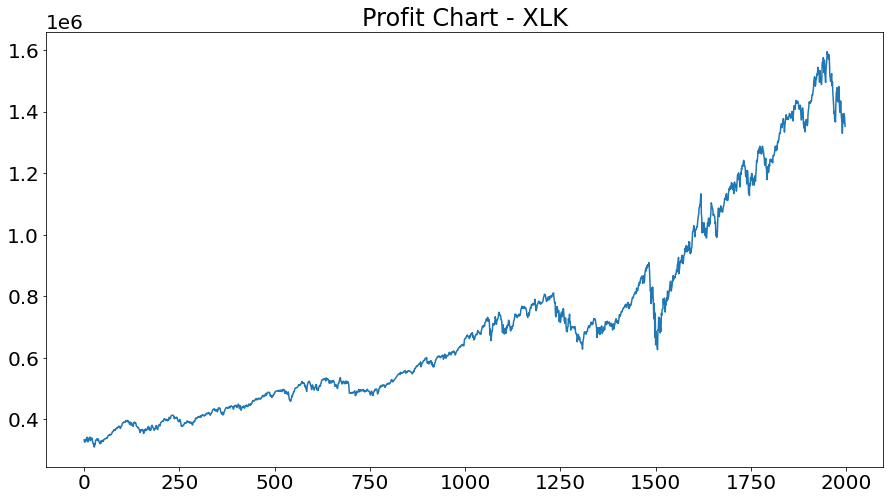

In [269]:
plt.rc('font', size=20)

plt.plot(value)

plt.title("Profit Chart - XLK")

plt.show()

In conclusion, this method is not as good as we hoped it would be. This is probably because of the fact that the strong stocks of some sectors are not an immediate indicator for the entire sector. However, in the long run it may work better than the other strategies, depending on the sectors we initially choose. 

As we expected, XLK outpreformed and got a yield of over 300%! Also XLY did very well for this period, while XLE did worse than in recent years. 


#Bollinger Bands & RSI Strategy

In this strategy, we want to focus on the Bollinger Bands & RSI technical analysis and build a strategy accordingly. 
First, let's see how the bolinger bands and RSI charts look like for some sector. 

In [2]:
def Bollinger_Bands(t, ticker_hist, period = 7, multiplier = 2):

  bollinger_data = ticker_hist
  bollinger_data['UpperBand'] = bollinger_data['Close'].rolling(period).mean() + bollinger_data['Close'].rolling(period).std() * multiplier
  bollinger_data['LowerBand'] = bollinger_data['Close'].rolling(period).mean() - bollinger_data['Close'].rolling(period).std() * multiplier

  plt.rcParams['figure.figsize'] = [12, 7]

  plt.rc('font', size=14)

  plt.plot(bollinger_data['Close'], label = t.get_info().get("symbol"))
  plt.plot(bollinger_data['UpperBand'], label = "Upper Bollinger Band")
  plt.plot(bollinger_data['LowerBand'], label = "Lower Bollinger Band")
  
  plt.title("Sector RSI")

  plt.legend()

  plt.show()

  return bollinger_data

In [3]:
#Example for Bollinger Bands for XLK

xlk_t = yf.Ticker("XLK")
xlk_hist = xlk_t.history(start="2021-01-01", end="2022-03-01", interval="1d")

period = 20 #Days
multiplier = 2 #Number of std

xlk_hist['UpperBand'] = xlk_hist['Close'].rolling(period).mean() + xlk_hist['Close'].rolling(period).std() * multiplier
xlk_hist['LowerBand'] = xlk_hist['Close'].rolling(period).mean() - xlk_hist['Close'].rolling(period).std() * multiplier

xlk_hist.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,UpperBand,LowerBand
Date,,,,,,,,,
2022-02-22,150.839996,153.449997,149.380005,151.029999,13446800,0.0,0,165.884275,148.886726
2022-02-23,152.600006,153.009995,147.089996,147.250000,18939700,0.0,0,166.469860,147.872141
2022-02-24,142.190002,152.389999,141.720001,152.279999,25483900,0.0,0,166.478688,147.848314
2022-02-25,152.509995,154.399994,150.639999,154.350006,14150800,0.0,0,166.328900,148.295102
2022-02-28,152.710007,154.720001,151.429993,154.070007,17408600,0.0,0,166.239918,147.991085


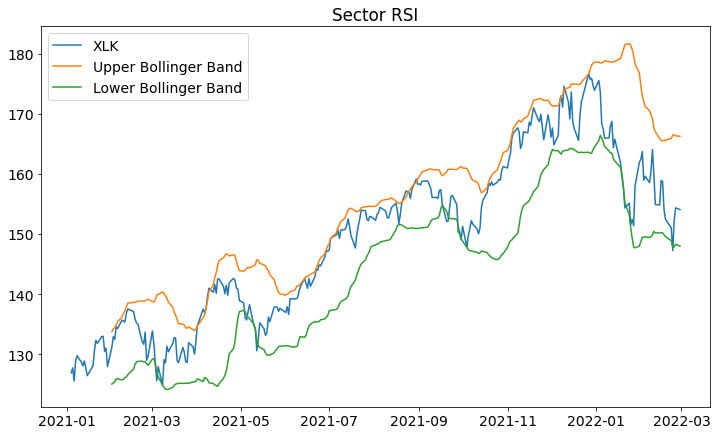

,Open,High,Low,Close,Volume,Dividends,Stock Splits,UpperBand,LowerBand
Date,,,,,,,,,
2021-01-04,129.692197,129.721985,125.285764,126.933220,10508600,0.0,0,NaN,NaN
2021-01-05,126.645406,127.965354,126.566009,127.756935,6180700,0.0,0,NaN,NaN
2021-01-06,125.930859,128.005057,125.166682,125.553734,13629000,0.0,0,NaN,NaN
2021-01-07,126.764502,129.186053,126.714877,128.937943,9826000,0.0,0,NaN,NaN
2021-01-08,129.573106,130.118952,128.302783,129.771591,6193800,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-02-22,150.839996,153.449997,149.380005,151.029999,13446800,0.0,0,165.884275,148.886726
2022-02-23,152.600006,153.009995,147.089996,147.250000,18939700,0.0,0,166.469860,147.872141
2022-02-24,142.190002,152.389999,141.720001,152.279999,25483900,0.0,0,166.478688,147.848314


In [4]:
Bollinger_Bands(xlk_t, xlk_hist, period, multiplier)

We want an indication of wether the specific sector is going to go down or up (or stay the same). This method indicates that a price is expected to go down when the price of the sector crosses the upper bound (which is the second std of the moving average in this case). So, we will buy when it is bigger than the upper bound and sell when it is smaller than te lower bound. However, as we can see, this method alone does not always work. We want to combine another technical analysis that would help us decide whether we should buy/sell. 
We can try several comibinations, such as MACD, SMA, Volume indications, etc. For now, we will use RSI. 
 

RSI(Relative strength index) is a common technical analysis. It is intended to chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period.

In our strategy, we would use something similar to the 30/70 RSI method. An RSI reading of 30 or below indicates an oversold or undervalued condition. During trends, the RSI readings may fall into a band or range. During an uptrend, the RSI tends to stay above 30 and should frequently hit 70. In our case, because we are also taking the Bollinger Bands in consideration, we can try changing our bounds.

In [5]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.DataFrame.ewm(u, com=period-1, adjust=False).mean() / \
         pd.DataFrame.ewm(d, com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)

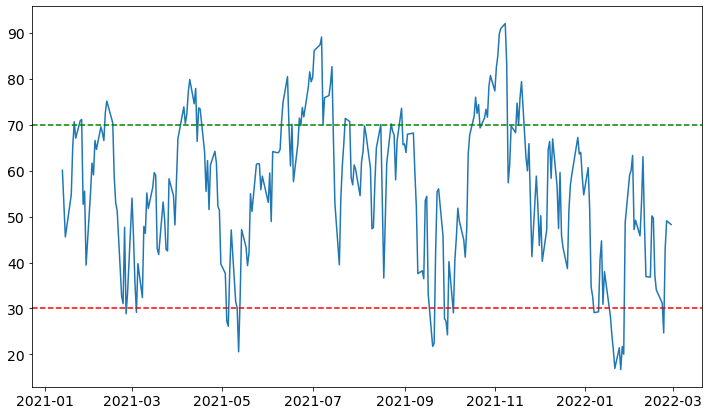

In [6]:
rsi_xlk = RSI(xlk_hist["Close"], 7)

plt.plot(rsi_xlk)
plt.axhline(y = 30, color = 'r', linestyle = '--')
plt.axhline(y = 70, color = 'g', linestyle = '--')

plt.show()

In this method, it is possible that we would be "stuck" in the stock for a long time because of the possibility that the RSI indicator will not cross the upper bound. We can also be "stuck" out of the stock for a long time because of the possibility that the RSI indicator will not cross the lower bound. We can do several things to deal with these problems: 


*   We will take sectors that give higher dividends so that if we will are "in the secetor" for a long time, at least we will get dividends. 
*   We will take sectors with different behaviours, so if we are stuck out of one sector we can invest in the others in the meanwhile. 
*   We will choose more volatile sectors.
*   We will choose a reletively small number as our rsi period number (for the avg). 
*   We will change the BB & RSI parameters during the process.



In [7]:
xlk_t = yf.Ticker("XLK")
xly_t = yf.Ticker("XLY")
xle_t = yf.Ticker("XLE")
xlu_t = yf.Ticker("XLU")
xlv_t = yf.Ticker("XLV")
xli_t = yf.Ticker("XLI")
xlb_t = yf.Ticker("XLB")
xlp_t = yf.Ticker("XLP")

In [8]:
print("XLY trailing annual dividend rate:", xly_t.get_info()["trailingAnnualDividendRate"])
print("XLK trailing annual dividend rate:", xlk_t.get_info()["trailingAnnualDividendRate"])
print("XLE trailing annual dividend rate:", xle_t.get_info()["trailingAnnualDividendRate"])
print("XLU trailing annual dividend rate:", xlu_t.get_info()["trailingAnnualDividendRate"])
print("XLV trailing annual dividend rate:", xlv_t.get_info()["trailingAnnualDividendRate"])
print("XLI trailing annual dividend rate:", xli_t.get_info()["trailingAnnualDividendRate"])
print("XLB trailing annual dividend rate:", xlb_t.get_info()["trailingAnnualDividendRate"])
print("XLP trailing annual dividend rate:", xlp_t.get_info()["trailingAnnualDividendRate"])

XLY trailing annual dividend rate: 1.17
XLK trailing annual dividend rate: 1.09
XLE trailing annual dividend rate: 2.08
XLU trailing annual dividend rate: 1.95
XLV trailing annual dividend rate: 1.81
XLI trailing annual dividend rate: 1.24
XLB trailing annual dividend rate: 1.31
XLP trailing annual dividend rate: 1.73


The sectors we chose are: 


1.   XLE
2.   XLU



In [32]:
xle_hist = xle_t.history(start="2021-01-01", end="2022-03-01", interval="1d")

xlu_hist = xlu_t.history(start="2021-01-01", end="2022-03-01", interval="1d")

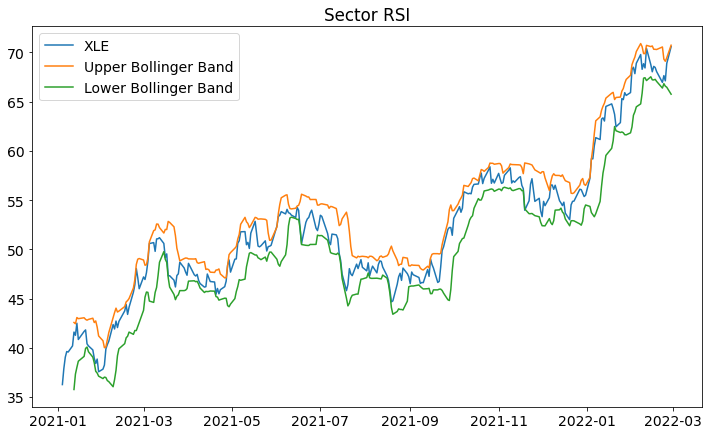

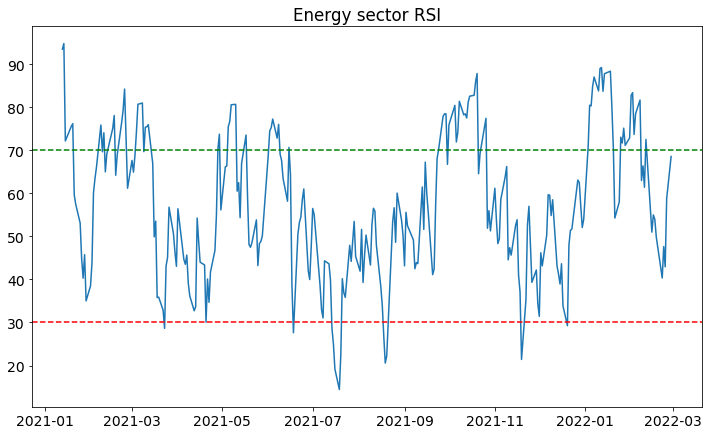

In [14]:
BB_xle = Bollinger_Bands(xle_t, xle_hist, 7, multiplier)

rsi_xle = RSI(xle_hist["Close"], 7)

plt.plot(rsi_xle)
plt.axhline(y = 30, color = 'r', linestyle = '--')
plt.axhline(y = 70, color = 'g', linestyle = '--')
plt.title("Energy sector RSI")
plt.show()



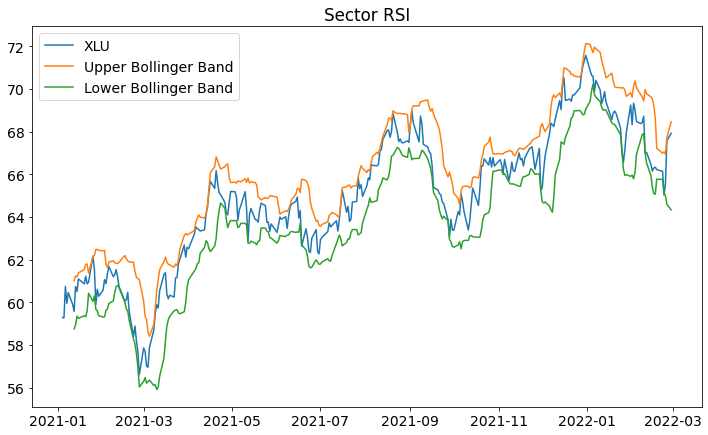

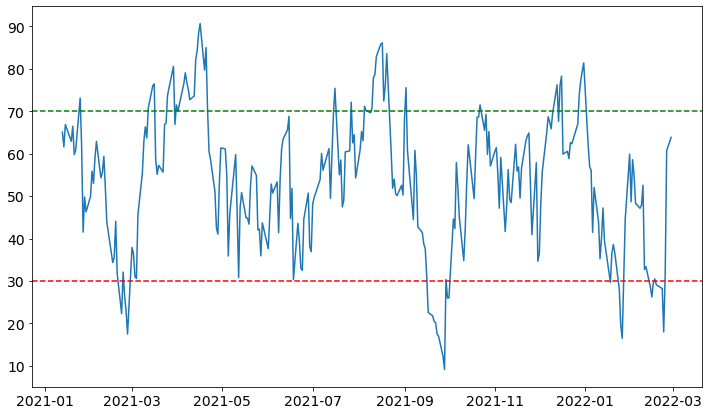

In [33]:
BB_xlu = Bollinger_Bands(xlu_t, xlu_hist, 7, multiplier)

rsi_xlu = RSI(xlu_hist["Close"], 7)

plt.plot(rsi_xlu)
plt.axhline(y = 30, color = 'r', linestyle = '--')
plt.axhline(y = 70, color = 'g', linestyle = '--')

plt.show()


We can see in the plots that with these parameters we will not have much tradings (because the bounds are too soft). We will try changing the multiplier to 1.5 and the RSI bounds to 35/65 so we would have more trading points. 

We can use the relevant functions that we used in class to see the buy/sell strategy

In [160]:
#Create a Function to signal when to buy and sell
def buy_sell_fun(data):

    data.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Dividends','Stock Splits'], inplace = True)

    data["rsi"] = RSI(data["Close"], 7)

    sig_price_buy = []
    sig_price_sell = []
    flag = -1

    for i in range(len(data)):
        if data['Close'][i] < data['LowerBand'][i] and data["rsi"][i] < 35:
            if flag != 1:
                sig_price_buy.append(data['Close'][i])
                sig_price_sell.append(np.nan)
                flag = 1
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)
        elif data['Close'][i] > data['UpperBand'][i] and data["rsi"][i] > 65:
            if flag !=0:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(data['Close'][i])
                flag = 0
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)
        else:
            sig_price_buy.append(np.nan)
            sig_price_sell.append(np.nan)

    return (sig_price_buy, sig_price_sell)


In [161]:
def chart_data(data,sector):
    #store the buy and sell data into a variable
    buy_sell = buy_sell_fun(data)
    data['buy_signal_price'] = buy_sell[0]
    data['sell_signal_price'] = buy_sell[1]

    #Looking for the dates of the buy signals
    buy_dates = data.loc[data['buy_signal_price']>0]

    #Looking for the dates of the sell signals
    sell_dates = data.loc[data['sell_signal_price']>0]

    #Dropping uneccessary columns
    buy_dates.drop(columns = ['sell_signal_price', 'UpperBand', 'LowerBand'], inplace = True)
    sell_dates.drop(columns = ['buy_signal_price', 'UpperBand', 'LowerBand'], inplace = True)

    # DF of dates with prices
    dates = pd.concat([buy_dates, sell_dates],sort = True)

    # Now to organize by the dates, drop adj_close price column, and make date the index
    dates.sort_values(by = 'Date', inplace = True)
    dates.drop(columns = ['Close'],inplace = True)

    #visualize data and strategy to buy and sell stock
    ab = plt.figure(figsize=(20,12))
    last_date = data.index[-1]
    first_date = data.index[0]

    plt.plot(data['Close'],label = 'Price', alpha = 0.35)
    plt.plot(data['LowerBand'], label = 'LowerBand', alpha = 0.35)
    plt.plot(data['UpperBand'],label = 'UpperBand', alpha = 0.35)
    plt.scatter(data.index, data['buy_signal_price'],label = 'Buy',marker = '^', color = 'green')
    plt.scatter(data.index, data['sell_signal_price'], label = 'Sell', marker = 'v', color = 'red')
    plt.title('{} adj close price history buy and sell signals'.format(sector))
    plt.xlabel('{} - {}'.format(first_date, last_date))
    plt.ylabel('Adj close price USD')
    plt.legend()
    plt.show()
    print(dates)



#1.1.2021 - Now

XLE

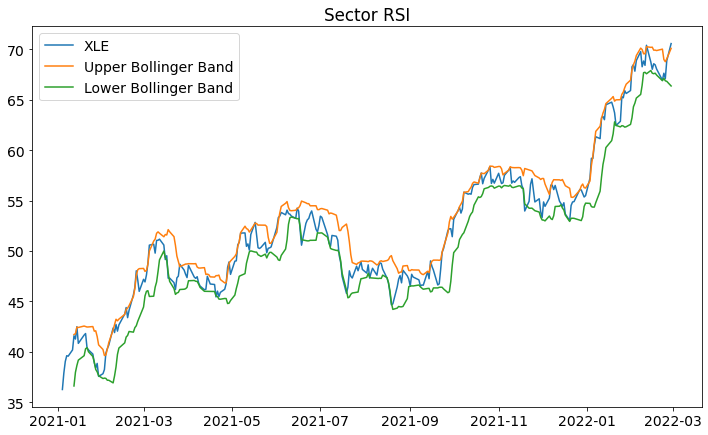

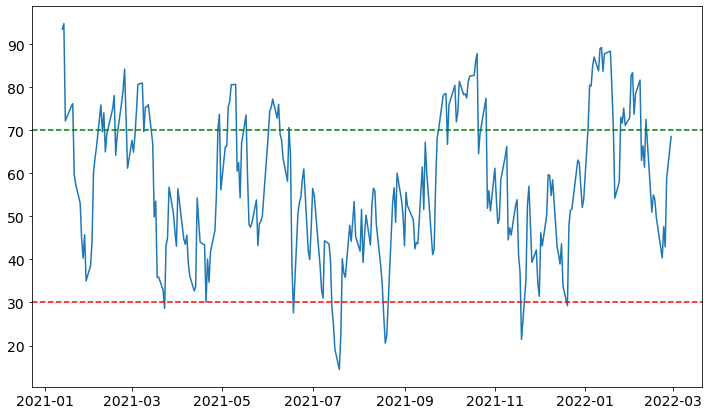

In [162]:
xle_hist = xle_t.history(start="2021-01-01", end="2022-03-01", interval="1d")
BB_xle = Bollinger_Bands(xle_t, xle_hist, 7, 1.5)

rsi_xle = RSI(xle_hist["Close"], 7)

plt.plot(rsi_xle)
plt.axhline(y = 30, color = 'r', linestyle = '--')
plt.axhline(y = 70, color = 'g', linestyle = '--')

plt.show()

Chart data of our Buy & Sell strategy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


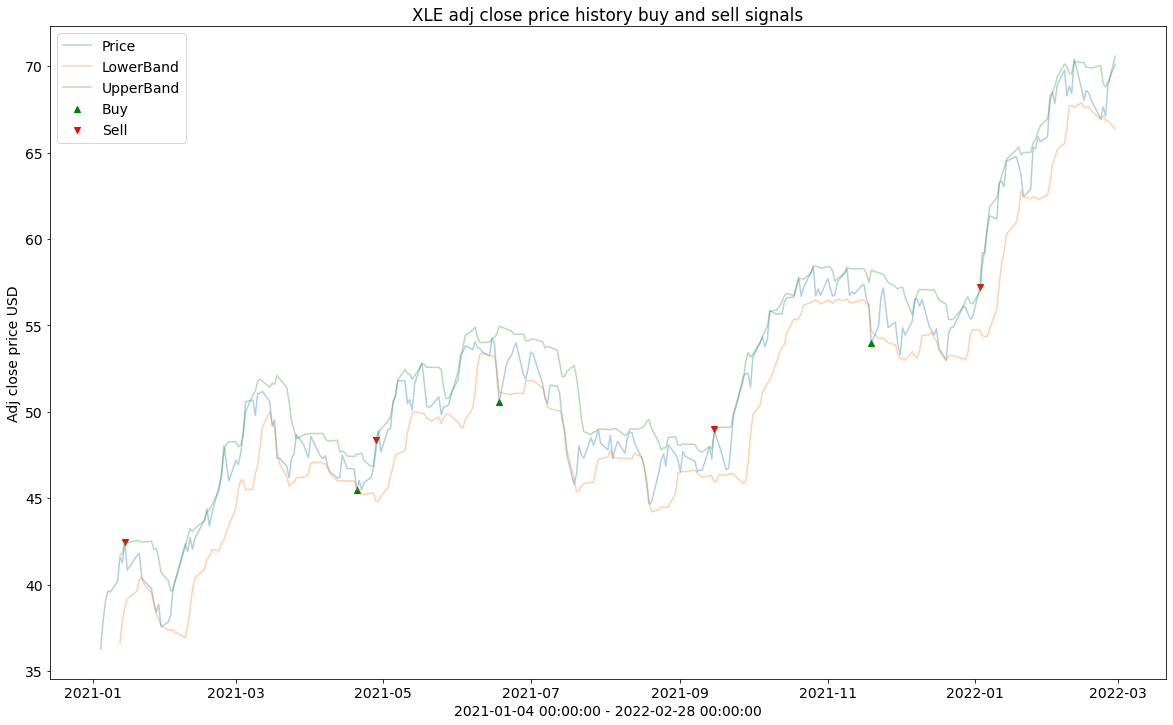

            buy_signal_price        rsi  sell_signal_price
Date                                                      
2021-01-14               NaN  94.809263          42.494572
2021-04-20         45.446091  30.072508                NaN
2021-04-28               NaN  70.253262          48.381210
2021-06-18         50.582546  27.609613                NaN
2021-09-15               NaN  67.253697          49.021965
2021-11-19         53.971161  21.406859                NaN
2022-01-03               NaN  70.874815          57.220001


In [163]:
chart_data(BB_xle, "XLE")

XLU

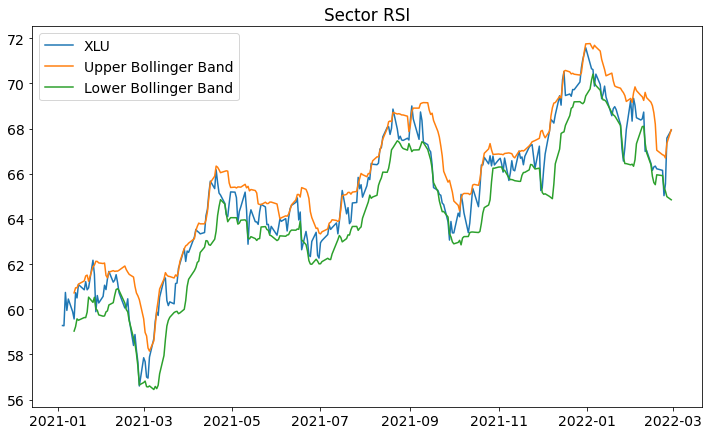

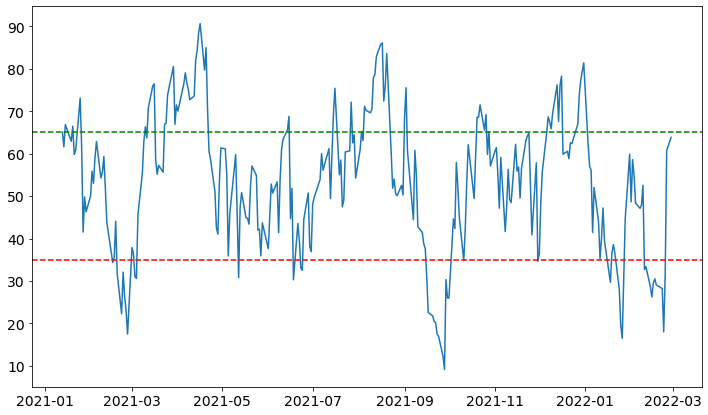

In [171]:
xlu_hist = xlu_t.history(start="2021-01-01", end="2022-03-01", interval="1d")
BB_xlu = Bollinger_Bands(xlu_t, xlu_hist, 7, 1.5)

rsi_xlu = RSI(xlu_hist["Close"], 7)

plt.plot(rsi_xlu)
plt.axhline(y = 35, color = 'r', linestyle = '--')
plt.axhline(y = 65, color = 'g', linestyle = '--')

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


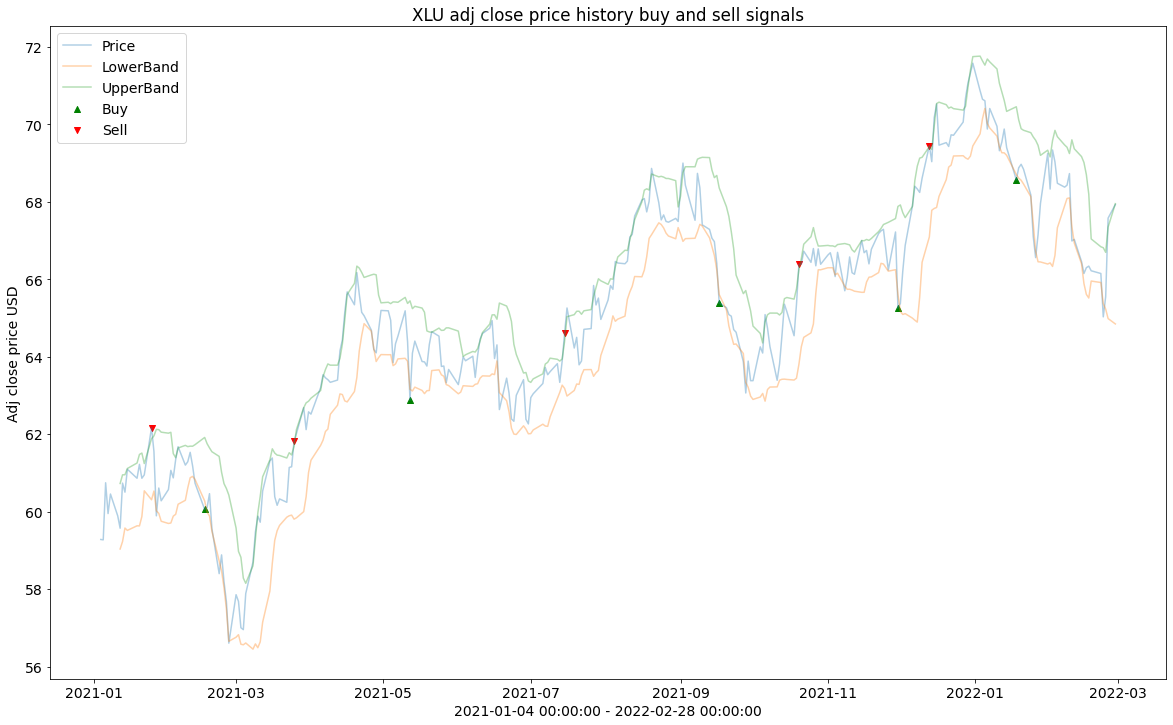

            buy_signal_price        rsi  sell_signal_price
Date                                                      
2021-01-25               NaN  73.080301          62.171432
2021-02-16         60.057026  34.340098                NaN
2021-03-25               NaN  73.719822          61.814854
2021-05-12         62.879951  30.794798                NaN
2021-07-15               NaN  69.253127          64.609093
2021-09-17         65.387047  22.586432                NaN
2021-10-20               NaN  68.596327          66.388176
2021-11-30         65.257065  34.643072                NaN
2021-12-13               NaN  76.203285          69.454079
2022-01-18         68.570000  29.679809                NaN


In [172]:
chart_data(BB_xlu, "XLU")

It is easy to see that this is a bad strategy,  Even if we take the dividends into consideration. We sell before major increases and buy before big decreases. 
Moreover, even if we don't buy or sell with the full amount and do it buy percentage, we still rather just leave the amount and not "play" with it. 

Note that I tried every many combinations of parameters but they were all equally bad. I also tried different sectors but in all of them it seemed pretty random. 

The outcome here is that it is preffered to just leave our money in the investment rather than trading with this strategy. 

#1.1.2019 - Now

We will now use different parameters to prove our point.

XLE

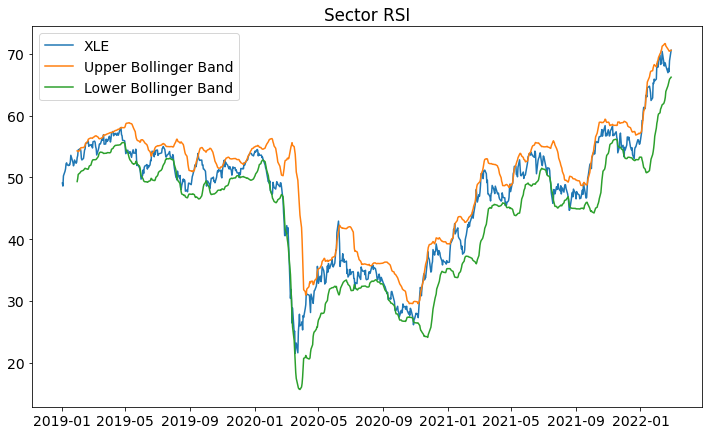

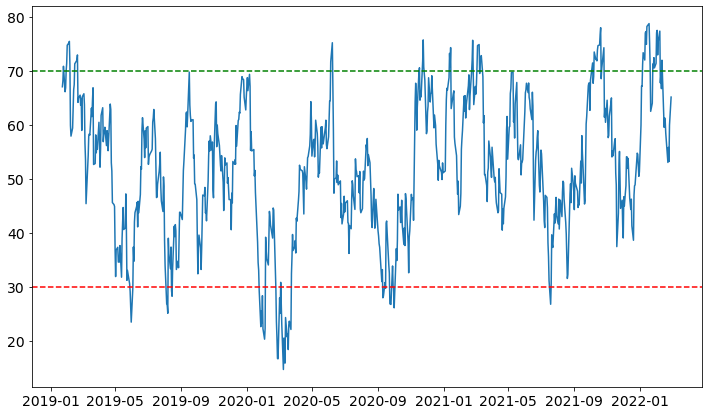

In [173]:
xle_hist = xle_t.history(start="2019-01-01", end="2022-03-01", interval="1d")
BB_xle = Bollinger_Bands(xle_t, xle_hist, 20, 2)

rsi_xle = RSI(xle_hist["Close"], 14)

plt.plot(rsi_xle)
plt.axhline(y = 30, color = 'r', linestyle = '--')
plt.axhline(y = 70, color = 'g', linestyle = '--')

plt.show()

Chart data of our Buy & Sell strategy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


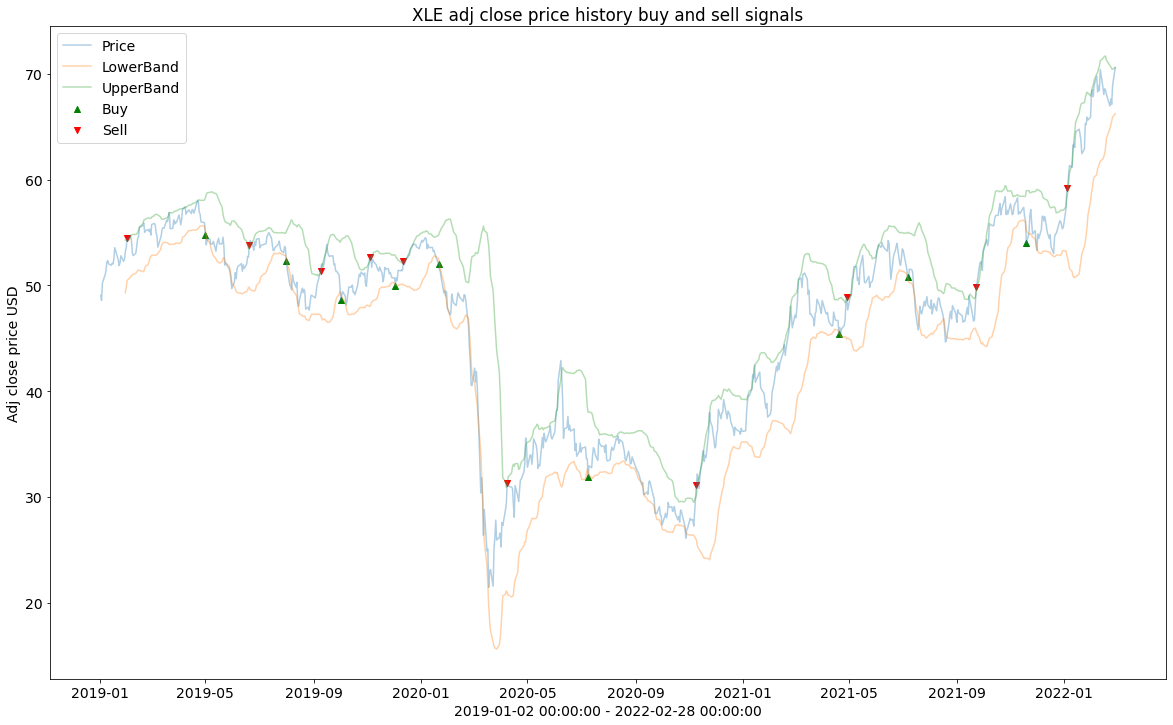

            buy_signal_price        rsi  sell_signal_price
Date                                                      
2019-02-01               NaN  77.040394          54.454998
2019-05-01         54.797512  22.436065                NaN
2019-06-20               NaN  73.280626          53.858715
2019-08-01         52.301937  28.617521                NaN
2019-09-09               NaN  75.040373          51.388702
2019-10-02         48.585770  15.779112                NaN
2019-11-04               NaN  72.909807          52.719994
2019-12-03         49.963848  28.996619                NaN
2019-12-12               NaN  69.829723          52.341030
2020-01-21         52.004894  21.637737                NaN
2020-04-08               NaN  69.555072          31.337055
2020-07-09         31.942947  24.363851                NaN
2020-11-09               NaN  76.283930          31.167473
2021-04-20         45.446091  30.071182                NaN
2021-04-29               NaN  73.747084          48.9218

In [174]:
chart_data(BB_xle, "XLE")

XLU

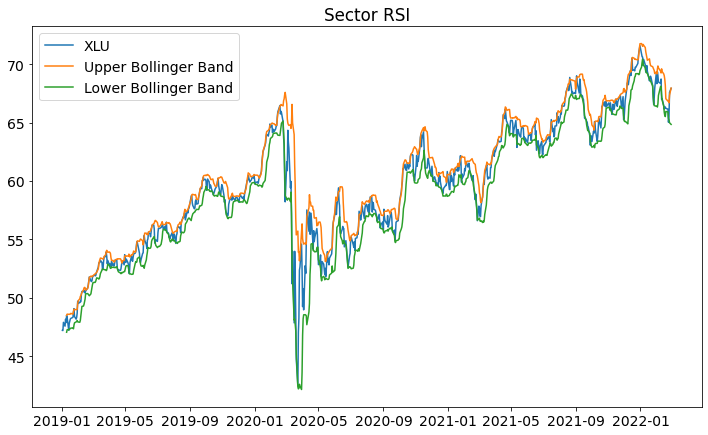

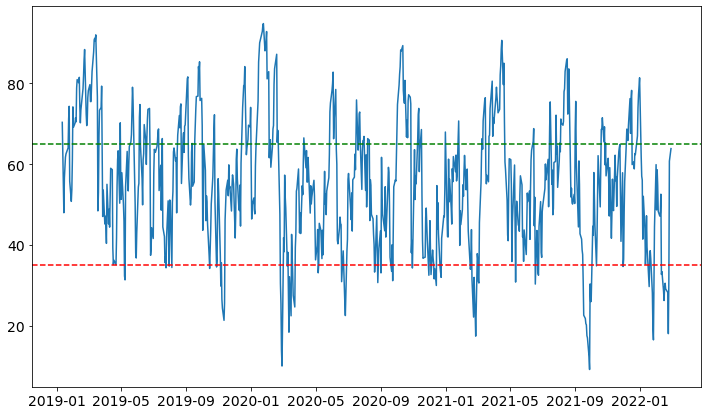

In [176]:
xlu_hist = xlu_t.history(start="2019-01-01", end="2022-03-01", interval="1d")
BB_xlu = Bollinger_Bands(xlu_t, xlu_hist, 7, 1.5)

rsi_xlu = RSI(xlu_hist["Close"], 7)

plt.plot(rsi_xlu)
plt.axhline(y = 35, color = 'r', linestyle = '--')
plt.axhline(y = 65, color = 'g', linestyle = '--')

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


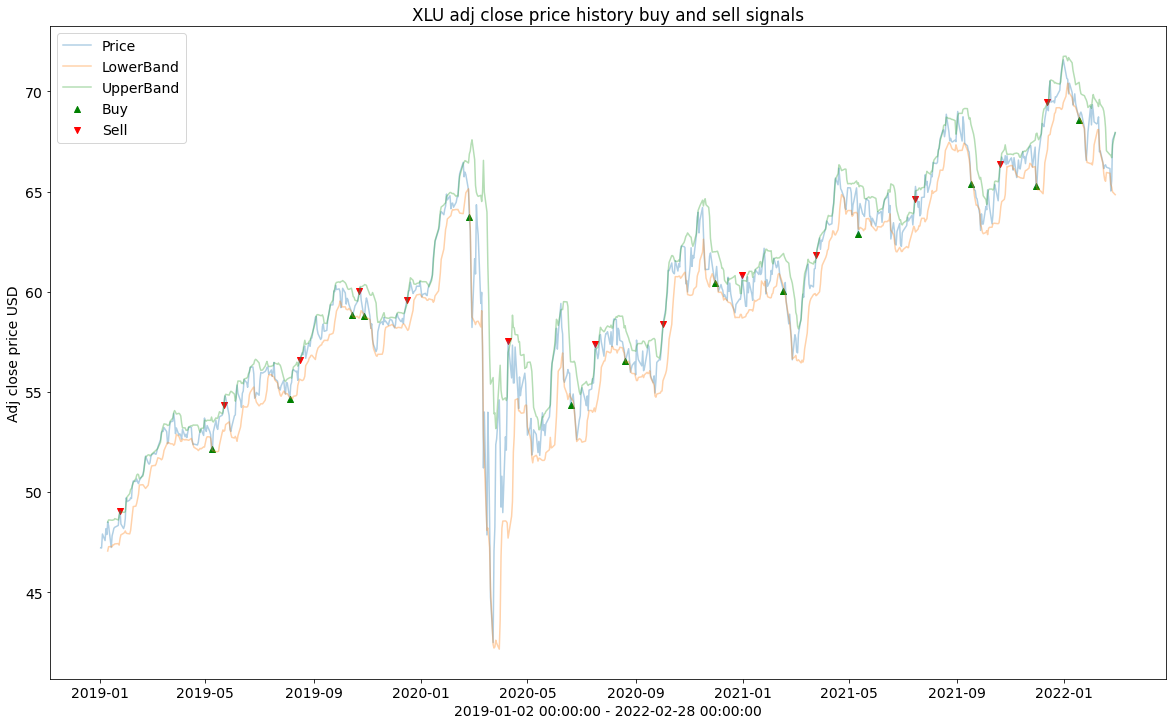

            buy_signal_price        rsi  sell_signal_price
Date                                                      
2019-01-24               NaN  74.304064          49.080772
2019-05-08         52.142921  32.291908                NaN
2019-05-22               NaN  73.571525          54.338032
2019-08-05         54.661171  34.397442                NaN
2019-08-16               NaN  67.201821          56.588001
2019-10-15         58.818722  34.167344                NaN
2019-10-23               NaN  68.346180          60.017204
2019-10-28         58.790852  34.521402                NaN
2019-12-16               NaN  74.027577          59.608425
2020-02-25         63.716228  30.489463                NaN
2020-04-09               NaN  66.486427          57.526241
2020-06-19         54.367641  30.898672                NaN
2020-07-17               NaN  75.880895          57.415295
2020-08-20         56.566605  33.268644                NaN
2020-10-02               NaN  74.757369          58.3707

In [177]:
chart_data(BB_xlu, "XLU")

#1.1.2010 - Now

XLE

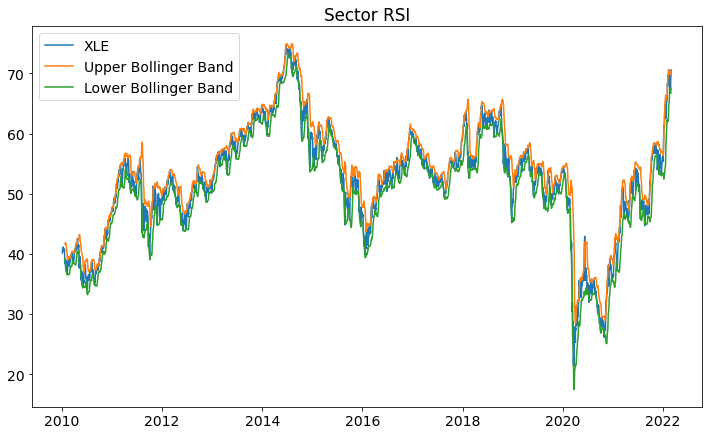

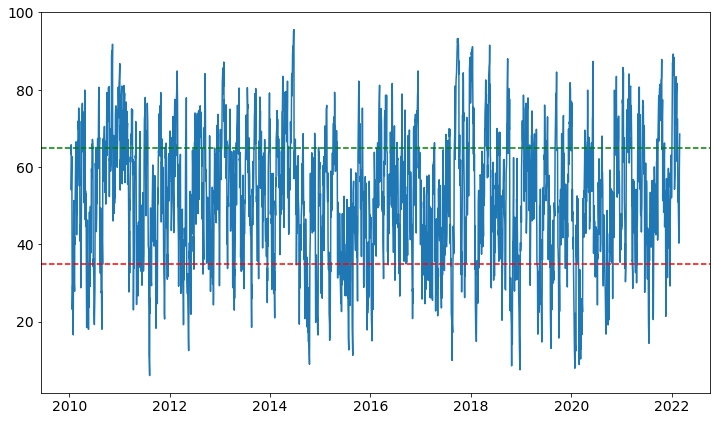

In [182]:
xle_hist = xle_t.history(start="2010-01-01", end="2022-03-01", interval="1d")
BB_xle = Bollinger_Bands(xle_t, xle_hist, 14, 1.7)

rsi_xle = RSI(xle_hist["Close"], 7)

plt.plot(rsi_xle)
plt.axhline(y = 35, color = 'r', linestyle = '--')
plt.axhline(y = 65, color = 'g', linestyle = '--')

plt.show()

Chart data of our Buy & Sell strategy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


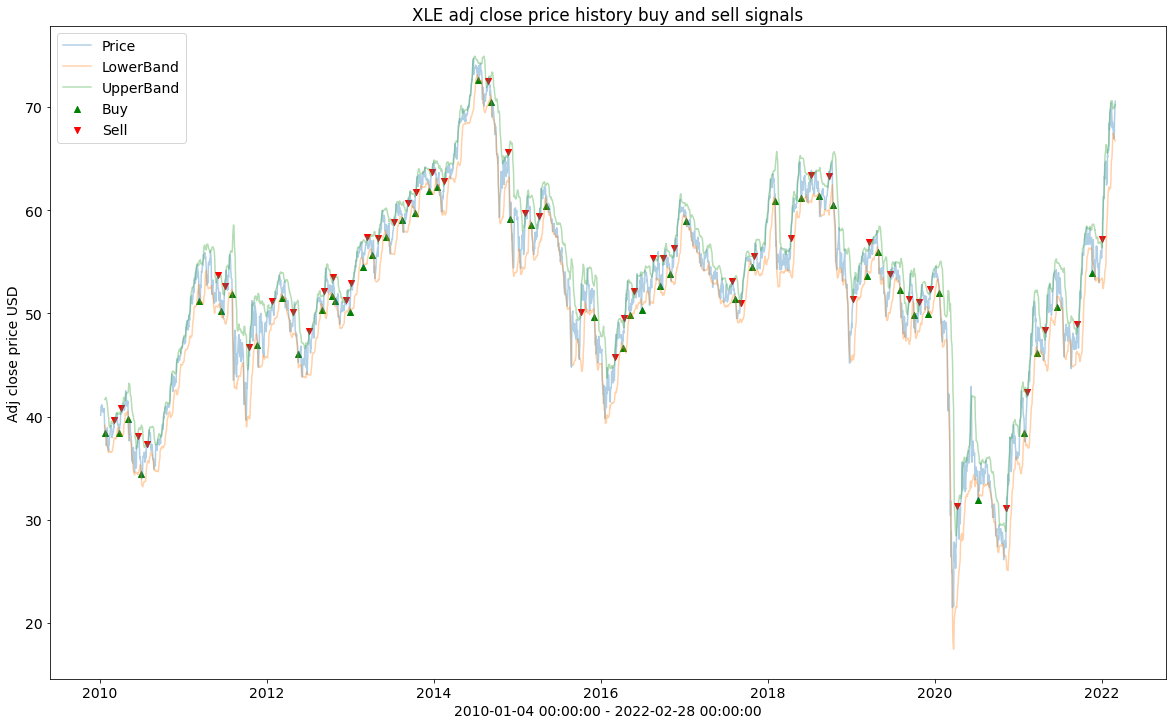

            buy_signal_price        rsi  sell_signal_price
Date                                                      
2010-01-22         38.406281  23.179841                NaN
2010-03-05               NaN  71.893487          39.668308
2010-03-25         38.376480  28.797106                NaN
2010-04-05               NaN  76.487557          40.786129
2010-05-05         39.731892  31.046758                NaN
...                      ...        ...                ...
2021-04-28               NaN  70.253007          48.381214
2021-06-18         50.582546  27.609611                NaN
2021-09-15               NaN  67.253697          49.021965
2021-11-19         53.971161  21.406859                NaN
2022-01-03               NaN  70.874815          57.220001

[100 rows x 3 columns]


In [183]:
chart_data(BB_xle, "XLE")

XLU

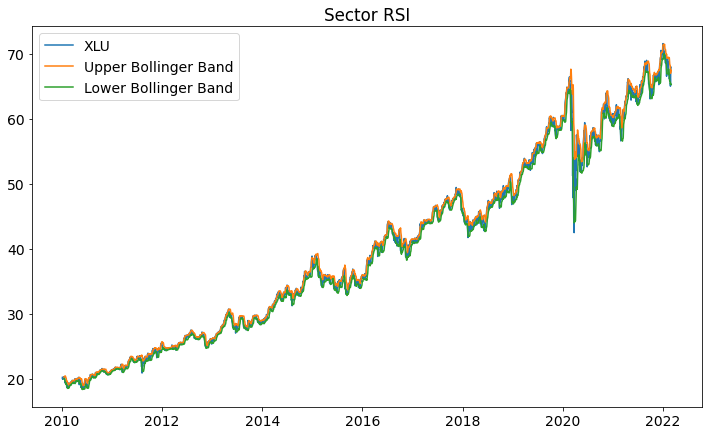

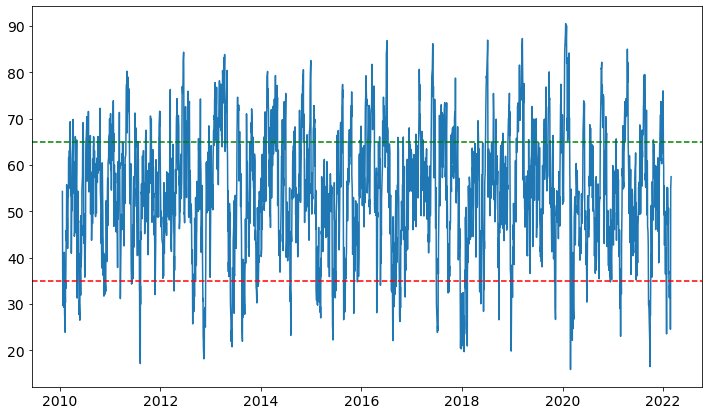

In [184]:
xlu_hist = xlu_t.history(start="2010-01-01", end="2022-03-01", interval="1d")
BB_xlu = Bollinger_Bands(xlu_t, xlu_hist, 10, 1.3)

rsi_xlu = RSI(xlu_hist["Close"], 10)

plt.plot(rsi_xlu)
plt.axhline(y = 35, color = 'r', linestyle = '--')
plt.axhline(y = 65, color = 'g', linestyle = '--')

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


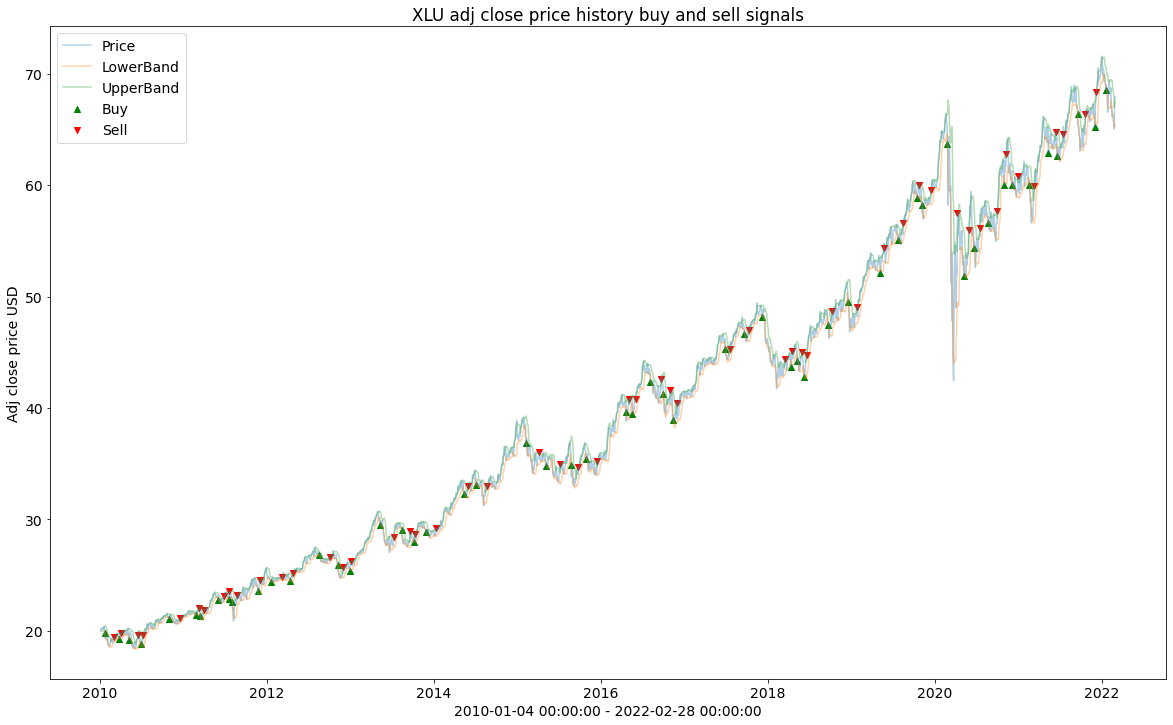

            buy_signal_price        rsi  sell_signal_price
Date                                                      
2010-01-21         19.829962  34.420420                NaN
2010-03-05               NaN  68.622029          19.485260
2010-03-25         19.278147  34.506241                NaN
2010-04-05               NaN  69.399619          19.849014
2010-05-06         19.199404  27.805133                NaN
...                      ...        ...                ...
2021-09-16         66.411186  31.020611                NaN
2021-10-20               NaN  68.596327          66.388176
2021-11-30         65.257065  34.643072                NaN
2021-12-07               NaN  68.664997          68.402344
2022-01-18         68.570000  29.679809                NaN

[109 rows x 3 columns]


In [185]:
chart_data(BB_xlu, "XLU")

In conclusion, this strategy was very dissapointing. I thought that it might be a good indication for when to buy and sell sectors but it was quite random. As I said, it is worse than just investing in the sector for the long term. As we saw, I used many different parameters to change the bollinger bands and RSI structure but noyhing worked. Maybe a fine solution would be a different combination (RSI & Volume considerations or Bollinger Bands & MACD) but the combination of Bollinger Bands & RSI did not work. It is also possible that this strategy doesnt work on sector trends and for stocks (which are usually more voatile) it would work. 

הערה לרונן: אשמח להבין ממך למה השיטה הזו לא עבדה טוב. לכאורה, הדרישה לקומבינציה בין שתי הניתוחים הטכניים הללו אמורה דווקא להחמיר עם האסטרטגיית קניה ומכירה ומתוך כך לכפות מכירה או קניה רק כשזה באמת משתלם. 
כשהתחלתי לעבוד על האסטרטגיה חשבתי שהיא תהיה הטובה מבין האסטרטגיות שלי ובפועל היא לא היתה. יש לך הסבר ללמה הקומבינציה הספציפית הזאת לא עבדה? אולי משהו בחישובים עצמם של שתי הניתוחים הללו מתנגש? 
ישבתי על זה המון זמן וניסיתי לחשוב על זה ללא הצלחה. 

תודה מראש

And so, taking all strategies into consideration, the best strategies for short-medium terms for people who would rather rebalance monthly would be the first two (who got similar results) - The 3 worst sectors and The 3 best sectors (for each month). For the long term it is better to use the strongest stocks SMA strategy, but it is important to chose our sectors wisely. 

I tried to get out of my comfort zone and I found out that this is not always the best idea. Sometimes the simplest methods are the best one. 

#Ranking

2021.01.01 - now:


1.   Historical Probabilities Strategy - 45% yield

2.   SMA of the strongest stocks strategy - 36% (if we only take XLE)

3.   Worst 3 sectors strategy - 30% - (remember that we decided that monthly rebalencing would be the best fit) 
4.   Best 3 sectors strategy - 29%

5.   SMA of the strongest stocks strategy - 14.5% (if we tak the average)

6.   Bollinger Bands & RSI - Smaller yield than the yield of the sector


2019.01.01 - now:


1.  SMA of the strongest stocks strategy - 86% (if we only take XLK & XLE)

2.  Best 3 sectors strategy - 80% 

3.  SMA of the strongest stocks strategy - 70.3% (if we tak the average)

4.  Worst 4 sectors strategy - 40% 

5.  Bollinger Bands & RSI - Smaller yield than the yield of the sector

6.  Historical Probabilities Strategy - 4%


2010.01.01 - now:


1.  SMA of the strongest stocks strategy - 305% (if we only take XLK)

2.  SMA of the strongest stocks strategy - 158.3% (if we tak the average) 

3.  Worst 4 sectors strategy - 127%  

4.  Best 3 sectors strategy - 121% 

5.  Bollinger Bands & RSI - Smaller yield than the yield of the sector

6.  Historical Probabilities Strategy - -40% 